# Keras - Deep Learning on Scenario A

Here, we will be applying deep neural networks in an to attempt to differentiate between Tor and nonTor data from the ISCXTor2016 dataset. 

In [1]:
# DataFrame handling
import pandas as pd

# Confusion matrix function
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# keras Models
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import CategoricalAccuracy, Precision, Recall

# sklearn Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split data with stratified cv
from sklearn.model_selection import StratifiedKFold, train_test_split

# Encoding of classifications
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical, normalize

print('Imports complete.')

Imports complete.


Using TensorFlow backend.


In [2]:
# Set up a few constants to keep track of
random_state=1
path='../../tor_dataset/Scenario-A/'
dep_var = 'class'
num_classes=0

In [3]:
def get_Xy(filename='', verbose=False):
    """
        This function takes a filename, loads the data into a dataframe, then separates the classification data
        
        args:
            filename => str, path to csv file to be loaded
            
        returns:
            list(X,y) => data, classifications
    """
    df = pd.read_csv(filename)
    
    if verbose:
        print('Before encoding and splitting:')
        print(df.head())
    
    # Actual data
    X = df.loc[:, df.columns != dep_var]
    
    # Set number of classes we see
    num_classes = df[dep_var].nunique()
    
    # Classifications
    encoder = LabelEncoder()
    y = encoder.fit_transform(df[dep_var])
    
    if verbose:
        print('Classification encoding:')
        for i in range(len(encoder.classes_)):
            print('\t{} => {}'.format(i, encoder.classes_[i]))
        
        print('After encoding and splitting:')
        print('X = ')
        print(X.head())
        print('\ny = ')
        print(y[:5])
    
    # X holds the data while y holds the classifications
    return X, y

In [4]:
!ls ../..

DeepLearning-TorTraffic  papers  tor_dataset


In [5]:
X, y = get_Xy('../../tor_dataset/Scenario-A/TimeBasedFeatures-15s-TOR-NonTOR.csv', verbose=True)

Before encoding and splitting:
   duration  total_fiat  total_biat  min_fiat  min_biat       max_fiat  \
0   9368711          16           4   1564818   1549373  190205.285714   
1   7340238          18           4   1567554   1527893  165686.977273   
2   4644225          29          15   1270547   1079974  165865.178571   
3   4978735          19           8   2492050   2457286  239543.250000   
4  11838189          19          10   3094089   3093543  243766.500000   

        max_biat      mean_fiat      mean_biat  flowPktsPerSecond  ...  \
0  203290.456522  389822.391917  370323.719754          10.353612  ...   
1  186914.846154  317267.548742  304370.651301          11.580006  ...   
2  195302.130435  329473.126261  300492.588227          11.412022  ...   
3  276596.388889  612435.304238  628339.573544           8.034169  ...   
4  295954.725000  599721.781709  625632.703972           7.602514  ...   

     std_flowiat  min_active   mean_active  max_active    std_active  \
0  2676

In [6]:
def show_conf_matrix(model, X_test, y_test, names):
    # Techniques from https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
    # and https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix#51163585
    
    predictions = model.predict(X_test)
    matrix = [ [ 0 for j in range(len(predictions[0])) ]  for i in range(len(predictions[0])) ]
    for i in range(len(predictions)):
        pred = predictions[i]
        test = y_test[i]

        guess = np.argmax(pred)
        actual = np.argmax(test)

        matrix[actual][guess] += 1
        
    df_cm = pd.DataFrame(matrix, range(len(matrix)), range(len(matrix)))
    int_cols = df_cm.columns
    df_cm.columns = names
    df_cm.index = names

    plt.figure(figsize=(10,7))
    sn.set(font_scale=1.5) # for label size
    ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap=sn.color_palette("Blues")) # font size
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

    plt.show()

Training for TimeBasedFeatures-15s-TOR-NonTOR.csvBefore encoding and splitting:
   duration  total_fiat  total_biat  min_fiat  min_biat       max_fiat  \
0   9368711          16           4   1564818   1549373  190205.285714   
1   7340238          18           4   1567554   1527893  165686.977273   
2   4644225          29          15   1270547   1079974  165865.178571   
3   4978735          19           8   2492050   2457286  239543.250000   
4  11838189          19          10   3094089   3093543  243766.500000   

        max_biat      mean_fiat      mean_biat  flowPktsPerSecond  ...  \
0  203290.456522  389822.391917  370323.719754          10.353612  ...   
1  186914.846154  317267.548742  304370.651301          11.580006  ...   
2  195302.130435  329473.126261  300492.588227          11.412022  ...   
3  276596.388889  612435.304238  628339.573544           8.034169  ...   
4  295954.725000  599721.781709  625632.703972           7.602514  ...   

     std_flowiat  min_active  

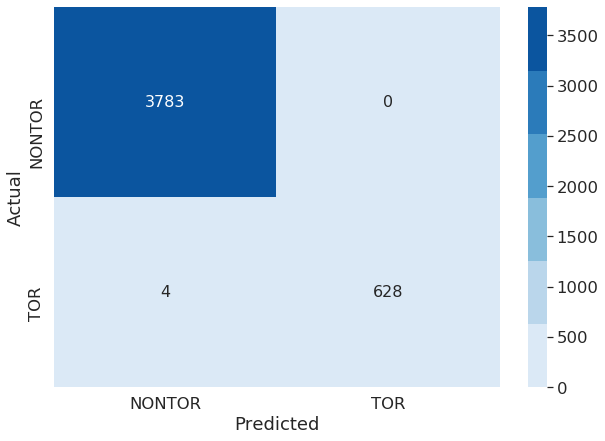

Training for downsampled_TimeBasedFeatures-15s-TOR-NonTOR.csvBefore encoding and splitting:
   duration  total_fiat  total_biat  min_fiat  min_biat   max_fiat   max_biat  \
0   2503844     2503725     2503548        54        10  1168796.0  1130894.0   
1   8165087     8164944     8164678       793       507  2982860.0  3019690.0   
2   7905757     7905757     7868987    347080       648  7558677.0  7521931.0   
3  13011626    13011408    13011293       545       399  3687359.0  3687369.0   
4  10614731    10614680    10574656      7339      7559  5295363.0  5295378.0   

      mean_fiat     mean_biat  flowPktsPerSecond  ...   std_flowiat  \
0  5.563833e+04  3.526124e+04          47.127537  ...  1.246777e+05   
1  8.164944e+05  8.164678e+05           2.694399  ...  8.742063e+05   
2  3.952878e+06  2.622996e+06           0.885431  ...  3.042497e+06   
3  6.848109e+05  5.914224e+05           3.304737  ...  8.506981e+05   
4  2.653670e+06  2.643664e+06           0.942087  ...  2.247411e+0

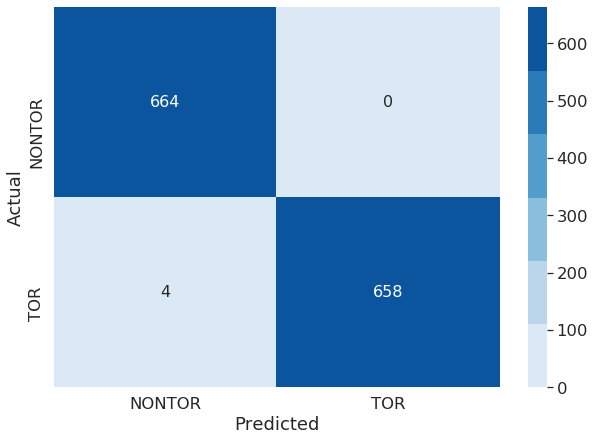

In [9]:
# Just run a DNN experiment
# All of the data files
files=['TimeBasedFeatures-15s-TOR-NonTOR.csv', 
       'downsampled_TimeBasedFeatures-15s-TOR-NonTOR.csv']

# Gathered from the getXy function
#0 => NONTOR
#1 => TOR
names = ['NONTOR', 'TOR']

for file in files:
    print('Training for {}'.format(file), end='')
    X, y = get_Xy(path + file, verbose=True)
    
    X = normalize(X)
    y = to_categorical(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Set up the metrics
    metrics = [
        CategoricalAccuracy(),
        Recall(),
        Precision()
    ]
    
    # Deep Neural Network
    dnn = Sequential([
            Dense(64, input_shape=(23,)),
            Dense(32, activation='relu'),
            Dense(2, activation='softmax')
    ])
    dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
        
    dnn.fit(X_train, y_train, epochs=25, verbose=0)
    
    results = dnn.evaluate(X_test, y_test, verbose=0)
    
    print('\nMetrics:')
    print('\tLoss\tAcc\tRecall\tPrecision')
    for result in results:
        print('\t{:.2f}'.format(result), end='')
    
    # Show a confusion matrix
    show_conf_matrix(dnn, X_test, y_test, names)

In [10]:
# All of the data files
files=['TimeBasedFeatures-15s-TOR-NonTOR.csv', 
       'downsampled_TimeBasedFeatures-15s-TOR-NonTOR.csv',
       'TimeBasedFeatures-30s-TOR-NonTOR.csv', 
       'TimeBasedFeatures-60s-TOR-NonTOR.csv', 
       'TimeBasedFeatures-120s-TOR-NonTOR.csv']

# Lists for accuracies collected from models
list_dummy = []
list_dt = []
list_knn = []
list_dnn = []

for file in files:
    print('Training for {}...'.format(file), end='')
    
    # Load in the data
    X, y = get_Xy(path + file)
    
    # Mean accuracies for each model
    mean_dummy = 0 # This is the worst kind of dummy
    mean_dt = 0
    mean_knn = 0
    mean_dnn = 0
    
    # 10-fold Stratified Cross-Validation
    n_splits = 10
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_idxs, test_idxs in skf.split(X, y):
        # Define the training and testing sets
        X_train, X_test = X.iloc[train_idxs], X.iloc[test_idxs]
        y_train, y_test = y[train_idxs], y[test_idxs]
        
        # Create a different version of the y_train and y_test for the Deep Neural Network
        y_train_dnn = to_categorical(y_train, num_classes=num_classes)
        y_test_dnn = to_categorical(y_test, num_classes=num_classes)
        
        # Initialize the sklearn models
        dummy = DummyClassifier(strategy='most_frequent')
        dt = DecisionTreeClassifier(random_state=random_state)
        knn = KNeighborsClassifier()
        
        # Deep Neural Network
        dnn = Sequential([
            Dense(64, input_shape=(23,)),
            Dense(32, activation='relu'),
            Dense(2, activation='softmax')
        ])
        dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        
        # Train the models
        dummy.fit(X_train, y_train)
        dt.fit(X_train, y_train)
        knn.fit(X_train, y_train)
        dnn.fit(x=X_train, y=y_train_dnn, epochs=1, batch_size=20, verbose=0, validation_data=(X_test, y_test_dnn))
        
        # Evaluate the models
        results_dummy = dummy.score(X_test, y_test)
        results_dt = dt.score(X_test, y_test)
        results_knn = knn.score(X_test, y_test)  
        results_dnn = ( dnn.evaluate(X_test, y_test_dnn, verbose=0) )[1]
        
        # Add the results to the running mean
        mean_dummy += results_dummy / (n_splits * 1.0)
        mean_dt += results_dt / (n_splits * 1.0)
        mean_knn += results_knn / (n_splits * 1.0)
        mean_dnn += results_dnn / (n_splits * 1.0)
    
    # Push the mean results from all of the splits to the lists
    list_dummy.append(mean_dummy)
    list_dt.append(mean_dt)
    list_knn.append(mean_knn)
    list_dnn.append(mean_dnn)
    
    print('done')
    
print('All trainings complete!')

Training for TimeBasedFeatures-15s-TOR-NonTOR.csv...done
Training for downsampled_TimeBasedFeatures-15s-TOR-NonTOR.csv...done
Training for TimeBasedFeatures-30s-TOR-NonTOR.csv...done
Training for TimeBasedFeatures-60s-TOR-NonTOR.csv...done
Training for TimeBasedFeatures-120s-TOR-NonTOR.csv...done
All trainings complete!


In [11]:
# Output results
print('File\t\t\t\t\tDummy\tDecision Tree\tk-Nearest Neighbor\tDeep Neural Network')
print('-'*82)
for i in range(len(files)):
    print('{}\t{:.2f}%\t{:.2f}%\t\t{:.2f}%\t\t\t{:.2f}%'.format(files[i], 100*list_dummy[i], 100*list_dt[i], 100*list_knn[i], 100*list_dnn[i]))

File					Dummy	Decision Tree	k-Nearest Neighbor	Deep Neural Network
----------------------------------------------------------------------------------
TimeBasedFeatures-15s-TOR-NonTOR.csv	84.99%	99.91%		99.88%			99.27%
downsampled_TimeBasedFeatures-15s-TOR-NonTOR.csv	49.94%	99.73%		99.58%			99.09%
TimeBasedFeatures-30s-TOR-NonTOR.csv	89.22%	99.90%		99.93%			99.92%
TimeBasedFeatures-60s-TOR-NonTOR.csv	94.44%	99.94%		99.91%			99.67%
TimeBasedFeatures-120s-TOR-NonTOR.csv	95.82%	99.96%		99.92%			99.86%
